authors: [Ali Ismail-Fawaz](https://hadifawaz1999.github.io/) and [Germain Forestier](https://germain-forestier.info/)

# **Classification**

Import packages used

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf

## Downloading the dataset

In [ ]:
!wget https://hadifawaz1999.github.io/teaching/Ensisa/2A-Info/DeepLearning/datasets/pokemon-stats-data.csv

--2024-02-22 09:54:29--  https://hadifawaz1999.github.io/teaching/Ensisa/2A-Info/DeepLearning/datasets/pokemon-stats-data.csv
Resolving hadifawaz1999.github.io (hadifawaz1999.github.io)... 185.199.111.153, 185.199.109.153, 185.199.110.153, ...
Connecting to hadifawaz1999.github.io (hadifawaz1999.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22598 (22K) [text/csv]
Saving to: ‘pokemon-stats-data.csv.3’

pokemon-stats-data. 100%[===================>]  22.07K  --.-KB/s    in 0.001s  

2024-02-22 09:54:29 (26.4 MB/s) - ‘pokemon-stats-data.csv.3’ saved [22598/22598]



## Reading the data

In [ ]:
df = pd.read_csv("pokemon-stats-data.csv")
df = df.dropna()

df = df[(df["type"] == "fairy") | (df["type"] == "ghost") | (df["type"] == "poison")]

df.head()

,name,weight_kg,speed,sp_attack,sp_defense,type
22,Ekans,6.9,55,40,54,poison
23,Arbok,65.0,80,65,79,poison
28,Nidoran♀,7.0,41,40,40,poison
29,Nidorina,20.0,56,55,55,poison
30,Nidoqueen,60.0,76,75,85,poison


## Extract the features to be used

In [ ]:
X = np.asarray(df[["weight_kg","speed","sp_attack","sp_defense"]], dtype=np.float32)
Y_text = np.asarray(df["type"], dtype=str)
Y = LabelEncoder().fit_transform(Y_text)

print("Number of samples in the dataset is "+str(len(X)))
print(np.unique(Y, return_counts=True))

Number of samples in the dataset is 75
(array([0, 1, 2]), array([18, 27, 30]))


## Split the dataset into train and test sets

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=33/100, random_state=42, stratify=Y)

print("Number of training examples is "+str(len(xtrain)))
print("Number of testing examples is "+str(len(xtest)))

Number of training examples is 50
Number of testing examples is 25


## Normalize the dataset

In [ ]:
min_max_scaler = MinMaxScaler().fit(xtrain)
xtrain = min_max_scaler.transform(xtrain)
xtest = min_max_scaler.transform(xtest)

## Transforming labels to Binary Classification

class 0: poison
class 1: not-poison

In [ ]:
ytrain_binary = np.zeros(shape=ytrain.shape)
ytest_binary = np.zeros(shape=ytest.shape)

ytrain_binary[ytrain == 0] = 0
ytrain_binary[ytrain != 0] = 1

ytest_binary[ytest == 0] = 0
ytest_binary[ytest != 0] = 1

## Create using Tensorflow-Keras a linear model

In [ ]:
input_shape = xtrain.shape[1:]
input_layer = tf.keras.layers.Input(input_shape)

output_layer = tf.keras.layers.Dense(units=1, activation="sigmoid")(input_layer)

model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the model on the Binary Classification task

In [ ]:
tf.random.set_seed(42)

history = model.fit(xtrain, ytrain_binary, batch_size=12, epochs=1000, verbose=0, validation_data=(xtest, ytest_binary))

## Visualize the train/test loss and train/test accuracy changing during training

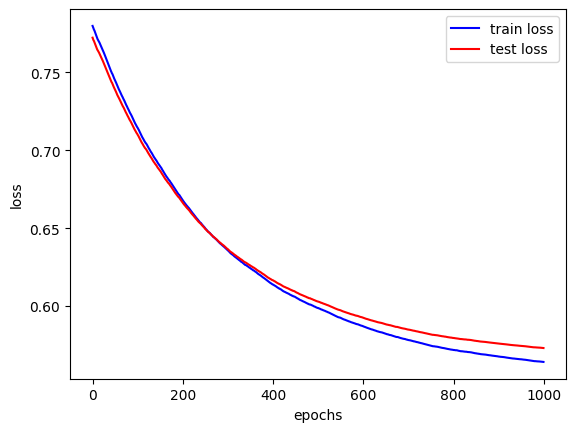

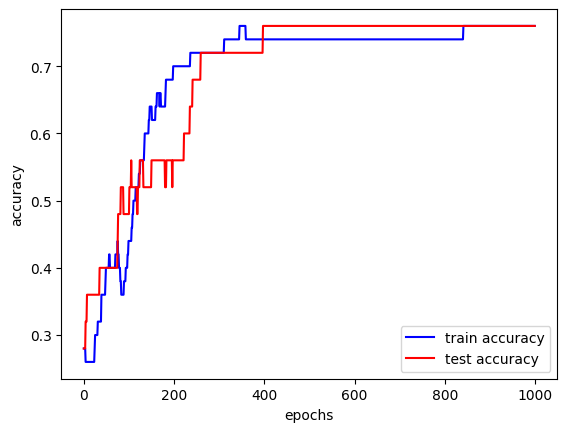

In [ ]:
hist = history.history

train_loss = hist["loss"]
test_loss = hist["val_loss"]
train_acc = hist["accuracy"]
test_acc = hist["val_accuracy"]

plt.figure()
plt.plot(train_loss, color="blue", label="train loss")
plt.plot(test_loss, color="red", label="test loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()
plt.close()

plt.figure()
plt.plot(train_acc, color="blue", label="train accuracy")
plt.plot(test_acc, color="red", label="test accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()
plt.close()

## Evaluate the model on the train set

In [ ]:
ypred_train_binary = model.predict(xtrain)

# make the decision
ypred_train_binary[ypred_train_binary > 0.5] = 1
ypred_train_binary[ypred_train_binary <= 0.5] = 0

accuracy_train_binary = accuracy_score(ytrain_binary, ypred_train_binary)
print("Accuracy of binary classification on the train is: "+str(accuracy_train_binary))

2/2 [==============================] - 0s 6ms/step
Accuracy of binary classification on the train is: 0.76


## Evaluate the model on the test set

In [ ]:
ypred_test_binary = model.predict(xtest)

# make the decision
ypred_test_binary[ypred_test_binary > 0.5] = 1
ypred_test_binary[ypred_test_binary <= 0.5] = 0

accuracy_test_binary = accuracy_score(ytest_binary, ypred_test_binary)
print("Accuracy of binary classification on the test is: "+str(accuracy_test_binary))

1/1 [==============================] - 0s 21ms/step
Accuracy of binary classification on the test is: 0.76


## Exercise: Use the three classes now to do a multi-class classification instead of a Binary Classification, on the same data

## Build the keras model

In [ ]:
# your code here

## Transform the labels to one hot vectors, for train and test

In [ ]:
# your code here

## Train the model

In [ ]:
# your code here

## Plot the loss and accuracy changing during training

In [ ]:
# your code here

## Evaluate on the train and test sets

In [ ]:
# your code here